In [1]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *

sim_name = f"no_gravity"
sim_folder = f"sim_output/{sim_name}"
fig_folder = f"figures_local/{sim_name}"
Cl_folder = f"Shared/Cls"
Delta_folder = f"Shared/Deltas"
nu_m_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
nu_m_picks = jnp.array([0.01, 0.05, 0.1, 0.2, 0.3])*Params.eV
simdata = SimData(sim_folder)

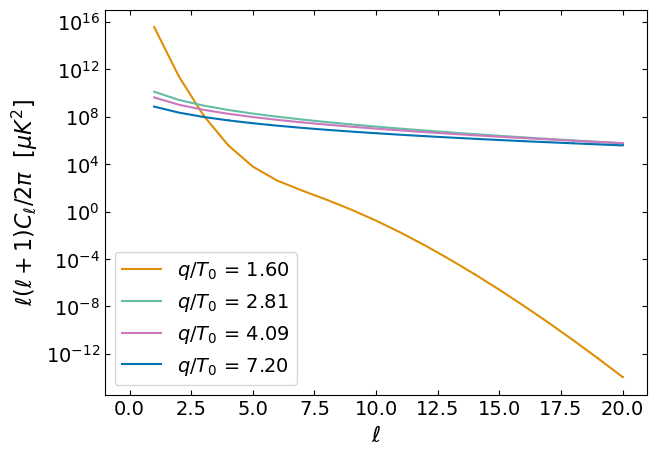

In [5]:
def PLOT_Fig3():

    q_div_T_CNB_arr = Primordial.Cl_qs
    idx_1p5 = np.abs(q_div_T_CNB_arr - 1.5).argmin()
    idx_3p0 = np.abs(q_div_T_CNB_arr - 3.0).argmin()
    idx_4p5 = np.abs(q_div_T_CNB_arr - 4.5).argmin()
    idx_7p5 = np.abs(q_div_T_CNB_arr - 7.5).argmin()
    val_1p5 = q_div_T_CNB_arr[idx_1p5]
    val_3p0 = q_div_T_CNB_arr[idx_3p0]
    val_4p5 = q_div_T_CNB_arr[idx_4p5]
    val_7p5 = q_div_T_CNB_arr[idx_7p5]

    m_val = 0.05

    clqs_matrix = jnp.load(f"{Cl_folder}/Cls_z=0_m={m_val}eV.npy")

    plt.figure(figsize=(7,5))

    colors = ["#C74804", "#66bda5", "#CC78BC", "#DE8F05", "#0173B2"]

    l_high = 21

    plt.semilogy(
        np.arange(1,l_high,1), 
        np.arange(1,l_high,1)*np.arange(2,l_high+1,1)*clqs_matrix[0]/2/np.pi, 
        label=fr'$q/T_0$ = {val_1p5:.2f}', color=colors[3], marker=',')
    plt.semilogy(
        np.arange(1,l_high,1), 
        np.arange(1,l_high,1)*np.arange(2,l_high+1,1)*clqs_matrix[idx_3p0]/2/np.pi, 
        label=fr'$q/T_0$ = {val_3p0:.2f}', color=colors[1], marker=',')
    plt.semilogy(
        np.arange(1,l_high,1), 
        np.arange(1,l_high,1)*np.arange(2,l_high+1,1)*clqs_matrix[idx_4p5]/2/np.pi, 
        label=fr'$q/T_0$ = {val_4p5:.2f}', color=colors[2], marker=',')
    plt.semilogy(
        np.arange(1,l_high,1), 
        np.arange(1,l_high,1)*np.arange(2,l_high+1,1)*clqs_matrix[idx_7p5]/2/np.pi, 
        label=fr'$q/T_0$ = {val_7p5:.2f}', color=colors[4], marker=',')
    # plt.semilogy(
    #     np.arange(1,l_high,1), 
    #     np.arange(1,l_high,1)*np.arange(2,l_high+1,1)*clsqindep_l/2/np.pi, 
    #     label=r'$q$ averaged', color=colors[0], marker=',', linestyle='--')

    plt.xlim(-1, 21)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi \ \ [\mu K^2]$')
    plt.legend()
    plt.savefig(f'Tully_and_Zhang_Fig3.pdf')
    plt.show(); plt.close()

PLOT_Fig3()